In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
training_images.shape

(60000, 28, 28)

In [4]:
training_images[0].shape

(28, 28)

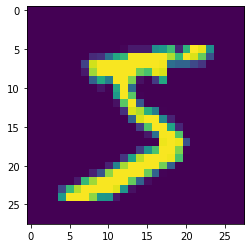

In [5]:
plt.imshow(training_images[0])

In [6]:
training_labels[0]

5

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [0]:
training_images = training_images.astype("float") / 255.0
test_images = test_images.astype("float") / 255.0

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, (3,3), activation = "relu", input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation (Activation)      (None, 10)                0

In [0]:
training_images = training_images.reshape(60000, 28, 28,1)
test_images = test_images.reshape(10000, 28, 28,1)

In [13]:
model.compile(optimizer="adam", loss= "sparse_categorical_crossentropy", metrics=["acc"])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2521 - acc: 0.9239 - val_loss: 0.0733 - val_acc: 0.9764
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1059 - acc: 0.9684 - val_loss: 0.0550 - val_acc: 0.9814
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0824 - acc: 0.9750 - val_loss: 0.0489 - val_acc: 0.9835
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0641 - acc: 0.9795 - val_loss: 0.0430 - val_acc: 0.9859
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0532 - acc: 0.9839 - val_loss: 0.0407 - val_acc: 0.9871
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0460 - acc: 0.9854 - val_loss: 0.0436 - val_acc: 0.9864
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0397 - acc: 0.9872 - val_loss: 0.0405 - val_acc: 0.9876
Epoch 8/50
1875/1875 [==============================] - 9s 5ms

In [0]:
model.save("handwritingNumberDetection.h5")